Para esse trabalho, eu e meu colega escolhemos o tema "Consumo de combustível por velocidade em um carro". Para isso, coletamos dados oficiais do INMETRO atualizados para 2025. 

A tabela está inclusa na pasta, e foi convertida para uma tabela Excel, e depois para um arquivo de valores CSV.

---

# ETAPA 1: IMPORTANDO BIBLIOTECAS E BANCO DE DADOS CSV 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [89]:
import sympy as sp

In [90]:
df = pd.read_csv('tabela_inmetro_carros_2025.csv', sep=';', encoding='Latin-1', decimal=',')

---

# ETAPA 2: LEITURA E ANÁLISE DO ARQUIVO CSV

In [91]:
df.head(20)

,Categoria,Marca,Modelo,Versão,Motor,Propulsão,Transmissão e Velocidades,Ar\nCondicionado,Direção\nAssistida,Combustível,...,Emissões Gasolina/Diesel (CO2 g/km),Emissões PHEV (CO2 g/km),Consumo Etanol - Cidade (km/l),Consumo Etanol - Estrada (km/l),Consumo Gas. ou Di. - Cidade (km/l),Consumo Gas. ou Di. - Estrada (km/l),Consumo EV ou PHEV - Cidade (km/l e),Consumo EV ou PHEV - Estrada (km/l e),Consumo Energético (MJ/km),Autonomia Elétrico (km)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Médio,CHEVROLET,ONIX PLUS,LT,1.0T - 12V,Combustão,M-6,S,E,F,...,87,\,"9,2","12,4","13,5","17,4",\,\,1.43,\
2,Médio,CHEVROLET,ONIX PLUS,LT2,1.0 - 12 V,Combustão,M-6,S,E,F,...,85,\,"9,7","12,2","13,9","17,4",\,\,1.39,\
3,Médio,CHEVROLET,ONIX PLUS,PREMIER,1.0T - 12V,Combustão,A-6,S,E,F,...,99,\,"8,5",11,12,"15,6",\,\,1.59,\
4,Médio,CHEVROLET,ONIX PLUS,LT,1.0T - 12V,Combustão,A-6,S,E,F,...,99,\,"8,5",11,12,"15,6",\,\,1.59,\
5,Médio,CHEVROLET,ONIX PLUS,LTZ,1.0T - 12V,Combustão,A-6,S,E,F,...,99,\,"8,5",11,12,"15,6",\,\,1.59,\
6,Médio,CHEVROLET,ONIX PLUS,AT,1.0T - 12V,Combustão,A-6,S,E,F,...,99,\,"8,5",11,12,"15,6",\,\,1.59,\
7,Médio,CHEVROLET,ONIX PLUS (MY26),LTZ,1.0T - 12V,Combustão,A-6,S,E,F,...,97,\,"8,5","11,2","12,2",16,\,\,1.57,\
8,Médio,CHEVROLET,ONIX PLUS (MY26),PREMIER,1.0T - 12V,Combustão,A-6,S,E,F,...,97,\,"8,5","11,2","12,2",16,\,\,1.57,\
9,Médio,CHEVROLET,ONIX PLUS (MY26),MT,1.0T - 12V,Combustão,M-6,S,E,F,...,90,\,"9,2","12,3","13,3","16,8",\,\,1.44,\


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Categoria                              702 non-null    object 
 1   Marca                                  702 non-null    object 
 2   Modelo                                 702 non-null    object 
 3   Versão                                 672 non-null    object 
 4   Motor                                  702 non-null    object 
 5   Propulsão                              702 non-null    object 
 6   Transmissão e Velocidades              702 non-null    object 
 7   Ar
Condicionado                        702 non-null    object 
 8   Direção
Assistida                      702 non-null    object 
 9   Combustível                            702 non-null    object 
 10  NMOG+NOx
(mg/km)                       702 non-null    object 
 11  CO
(mg

In [93]:
df.shape

(703, 24)

In [94]:
marcas = df['Marca'].unique()
print(marcas)

[nan 'CHEVROLET' 'FIAT' 'GWM' 'HONDA' 'Hyundai' 'JAC' 'Mercedes-Benz'
 'MINI' 'MG' 'Nissan' 'Peugeot' 'Renault' 'BYD' 'CAOA CHERY' 'NETA'
 'PEUGEOT' 'AUDI' 'VOLVO' 'Volkswagen' 'TOYOTA' 'BMW' 'FORD' 'GAC' 'Geely'
 'KIA' 'LAMBORGHINI' 'LEAPMOTOR' 'LEXUS' 'Mitsubishi' 'NISSAN' 'PORSCHE'
 'ZEEKR' 'CITROEN' 'JEEP' 'LAND ROVER' 'FARIZON' 'FOTON' 'RAM' 'MCLAREN']


Marcas duplicadas: Nissan, Peugeot

In [95]:
new_df = df.replace('Nissan', 'NISSAN', inplace=True)

In [96]:
new_df = df.replace('Peugeot', 'PEUGEOT', inplace=True)

In [97]:
new_df = df

In [98]:
df.head(20)

,Categoria,Marca,Modelo,Versão,Motor,Propulsão,Transmissão e Velocidades,Ar\nCondicionado,Direção\nAssistida,Combustível,...,Emissões Gasolina/Diesel (CO2 g/km),Emissões PHEV (CO2 g/km),Consumo Etanol - Cidade (km/l),Consumo Etanol - Estrada (km/l),Consumo Gas. ou Di. - Cidade (km/l),Consumo Gas. ou Di. - Estrada (km/l),Consumo EV ou PHEV - Cidade (km/l e),Consumo EV ou PHEV - Estrada (km/l e),Consumo Energético (MJ/km),Autonomia Elétrico (km)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Médio,CHEVROLET,ONIX PLUS,LT,1.0T - 12V,Combustão,M-6,S,E,F,...,87,\,"9,2","12,4","13,5","17,4",\,\,1.43,\
2,Médio,CHEVROLET,ONIX PLUS,LT2,1.0 - 12 V,Combustão,M-6,S,E,F,...,85,\,"9,7","12,2","13,9","17,4",\,\,1.39,\
3,Médio,CHEVROLET,ONIX PLUS,PREMIER,1.0T - 12V,Combustão,A-6,S,E,F,...,99,\,"8,5",11,12,"15,6",\,\,1.59,\
4,Médio,CHEVROLET,ONIX PLUS,LT,1.0T - 12V,Combustão,A-6,S,E,F,...,99,\,"8,5",11,12,"15,6",\,\,1.59,\
5,Médio,CHEVROLET,ONIX PLUS,LTZ,1.0T - 12V,Combustão,A-6,S,E,F,...,99,\,"8,5",11,12,"15,6",\,\,1.59,\
6,Médio,CHEVROLET,ONIX PLUS,AT,1.0T - 12V,Combustão,A-6,S,E,F,...,99,\,"8,5",11,12,"15,6",\,\,1.59,\
7,Médio,CHEVROLET,ONIX PLUS (MY26),LTZ,1.0T - 12V,Combustão,A-6,S,E,F,...,97,\,"8,5","11,2","12,2",16,\,\,1.57,\
8,Médio,CHEVROLET,ONIX PLUS (MY26),PREMIER,1.0T - 12V,Combustão,A-6,S,E,F,...,97,\,"8,5","11,2","12,2",16,\,\,1.57,\
9,Médio,CHEVROLET,ONIX PLUS (MY26),MT,1.0T - 12V,Combustão,M-6,S,E,F,...,90,\,"9,2","12,3","13,3","16,8",\,\,1.44,\


In [99]:
df['Marca'].unique()

array([nan, 'CHEVROLET', 'FIAT', 'GWM', 'HONDA', 'Hyundai', 'JAC',
       'Mercedes-Benz', 'MINI', 'MG', 'NISSAN', 'PEUGEOT', 'Renault',
       'BYD', 'CAOA CHERY', 'NETA', 'AUDI', 'VOLVO', 'Volkswagen',
       'TOYOTA', 'BMW', 'FORD', 'GAC', 'Geely', 'KIA', 'LAMBORGHINI',
       'LEAPMOTOR', 'LEXUS', 'Mitsubishi', 'PORSCHE', 'ZEEKR', 'CITROEN',
       'JEEP', 'LAND ROVER', 'FARIZON', 'FOTON', 'RAM', 'MCLAREN'],
      dtype=object)

In [100]:
modelos = df['Modelo'].unique()
print(modelos)

[nan 'ONIX PLUS' 'ONIX PLUS (MY26)' 'ONIX (MY26)' 'SPARK EUV' 'SPIN'
 'CRONOS' 'ORA 03' 'CITY' 'CITY HATCH' 'HR-V' 'HR-V (mod. 26)' 'HB20S'
 'KONA' 'e-JS4' 'A200 AMG LINE' 'Cooper' 'Aceman' 'JCW-E' 'MG4' 'Versa'
 'E2008' 'Mégane' 'DOLPHIN MINI' 'ICAR EQ1' '500E' 'MOBI' 'e-JS1' 'E-KWID'
 'ARGO' 'HB20' 'JCW' 'AYA' '208' 'E-208' 'A3 Spotback' 'DOLPHIN'
 'YUAN PRO' 'TIGGO 7' 'ONIX' 'EX30' 'VIRTUS' 'POLO' 'TERA' 'COROLLA CROSS'
 'COROLLA' 'EC40' 'ID.4' 'e-tron GT' 'RS e-tron GT' 'Q5 SUV' 'SQ5 SUV'
 'SQ5 Sportback' 'Q5 Sportback' 'Q6 e-tron RWD' 'Q6 e-tron Quattro'
 'Q6 Sportback e-tron\nQuattro' 'SQ6 Sportback e-tron\nQuattro'
 'RS 6 Avant' 'Q7' 'Q8 Sportback' 'Q8 e-tron Sportback 55' 'Q8 e-tron 55'
 'A6 e-tron' 'A5' 'SQ8 e-tron Sportback' 'RSQ8' '420i' '530e' '320i'
 '330e' 'i4' 'IX' 'iX' 'I5' 'i5' 'i7' 'HAN' 'SEAL' 'TAN' 'SONG PLUS'
 'SONG PRO' 'KING' 'EQUINOX EV' 'BLAZER EV' 'EQUINOX' 'Territory'
 'Mustang Mach-E' 'AION ES' 'HYPTEC HT' 'AION V' 'EX5' 'ACCORD HYBRID'
 'IONIQ 5' 'e-J7' 'EV

In [101]:
df['Modelo'].value_counts().sum()

np.int64(702)

Para compor o banco de dados, foram análisados mais de 700 modelos (incluindo versões diferentes) de 38 marcas distintas. 

---

# ETAPA 3: VERIFICAÇÃO DE DADOS (MOTORES E COMBUSTÍVEIS MAIS POLUENTES)

In [102]:
combustiveis = ['D', 'G', 'F']

df['Emissões Gasolina/Diesel (CO2 g/km)'] = df['Emissões Gasolina/Diesel (CO2 g/km)'].replace('\\', np.nan)
df['Emissões Gasolina/Diesel (CO2 g/km)'] = pd.to_numeric(df['Emissões Gasolina/Diesel (CO2 g/km)'])

emissoes_medias = df.groupby('Combustível')['Emissões Gasolina/Diesel (CO2 g/km)'].mean()

print(emissoes_medias)

Combustível
D    230.000000
E      0.000000
F    103.966102
G    127.573333
Name: Emissões Gasolina/Diesel (CO2 g/km), dtype: float64


In [103]:
combustiveis_phev = ['D', 'G', 'F']

df['Emissões PHEV (CO2 g/km)'] = df['Emissões PHEV (CO2 g/km)'].replace('\\', np.nan)
df['Emissões PHEV (CO2 g/km)'] = pd.to_numeric(df['Emissões PHEV (CO2 g/km)'], errors='coerce')

emissoes_medias_phev = df.groupby('Propulsão')['Emissões PHEV (CO2 g/km)'].mean()

print(emissoes_medias_phev)

Propulsão
Combustão          NaN
ELÉTRICO      0.000000
Elétrico      0.000000
Híbrido            NaN
Plug-In       7.000000
Plug-in      23.735294
Name: Emissões PHEV (CO2 g/km), dtype: float64


Como pode ser observado, os tipos de motores mais poulentes são os exclusivamente movidos a combustão, sendo o mais poluente o motor a Diesel, emitindo mais de 230 g/km de CO2, em média. Porém, carros de propulsão híbrida apresentam uma taxa de emissões menor, sendo o mais "limpo" os híbridos plug-in, que possuem baterias recarregáveis de alta duração, e emitiram uma média de 23.7 g/km de CO2.

---

# ETAPA 4: ANÁLISE DO CONTEXTO E APLICAÇÃO DE FUNÇÃO PARA APROFUNDAMENTO

A nossa meta era analisar em um gráfico o consumo médio de um carro de acordo com a velocidade que ele trafega.

Para isso, encontramos a seguinte função:

C(v) = av² - bv + c, em que:

* C(v) = consumo médio por velocidade (L/km)
* v = velocidade (km/h)
* a = taxa de crescimento do consumo em velocidades maiores
* b = taxa de diminuição do consumo em velocidades menores
* c = consumo mínimo, ou seja, C(0) = c

De acordo com o INMETRO, o  procedimento de avaliação utilizado foi o Ensaio de Coast Down

" [...]
Os ensaios de coast down têm as seguintes etapas:

1. Preparação do veículo: o veículo é apresentado em condições adequadas para o teste. Ele passa por pesagem, calibração dos pneus, checagem da quilometragem rodada, do nível do tanque ou carga da bateria, identificação do chassi, pneus, entre outras informações importantes para o ensaio e identificação do automóvel.

2. Execução do ensaio: o veículo é conduzido até ultrapassar 100 km/h em uma pista reta e nivelada. Em seguida, o veículo é colocado em ponto morto, permitindo que ele desacelere naturalmente, sem uso dos freios. Durante o processo de desaceleração, é checado o tempo que o veículo leva para reduzir a velocidade a 90 km/h, 80 km/h, 70 km/h e assim sucessivamente, até chegar a 30 km/h.

3. Análise de dados: os dados coletados durante o ensaio são analisados para determinar a resistência ao movimento do veículo. Essa análise envolve o cálculo da resistência aerodinâmica (causada pelo arrasto do ar) e da resistência ao atrito (causada pela fricção dos pneus no asfalto e nos componentes mecânicos do veículo).

4. Aplicação dos resultados: os resultados obtidos são usados para calibração dos dinamômetros, que serão usados na etapa seguinte da auditoria, em laboratório. Eles também podem ser usados para melhorar o projeto do veículo, aperfeiçoar a eficiência do combustível, entre outros."

Inmetro realiza teste em pista para verificar a eficiência energética de 24 veículos nacionais e importados -
https://www.gov.br/inmetro/pt-br/centrais-de-conteudo/noticias/inmetro-realiza-teste-em-pista-para-verificar-a-eficiencia-energetica-de-24-veiculos-nacionais-e-importados

Em suma:

 * A velocidade mínima (v0) é 30km/h
 * A velocidade máxima (v) é 100km/h

Isso significa que:

 * O limite de C(v), em que v -> 30 = C(30)
 * O limite de C(v), em que v -> 100 = C(100)

Ou seja:

 * Domínio = 30 ≤ v ≤ 100
 * A velocidade ideal da derivada C'(v) só é válida se estiver dentro deste intervalo.

In [104]:
from sympy import symbols, diff

In [105]:
v = symbols('v')
a = symbols('a')
b = symbols('b')
c = symbols('c')

In [106]:
f1 = a*v**2 - b*v + c
derivada_f1 = diff(f1, v)
print(f'C´(v) = {derivada_f1}\n')

C´(v) = 2*a*v - b



 A derivada da função encontrada foi C'(v) = 2av - b.

---

# ETAPA 5: ANÁLISE GRÁFICA

In [107]:
df['Consumo Gas. ou Di. - Cidade (km/l)'] = df['Consumo Gas. ou Di. - Cidade (km/l)'].replace('\\', np.nan)
df['Consumo Gas. ou Di. - Estrada (km/l)'] = df['Consumo Gas. ou Di. - Estrada (km/l)'].replace('\\', np.nan)

In [108]:
df['Consumo Gas. ou Di. - Cidade (km/l)'] = df['Consumo Gas. ou Di. - Cidade (km/l)'].astype(str).str.replace(',', '.').astype(float)
df['Consumo Gas. ou Di. - Estrada (km/l)'] = df['Consumo Gas. ou Di. - Estrada (km/l)'].astype(str).str.replace(',', '.').astype(float)

In [109]:
df.head()

,Categoria,Marca,Modelo,Versão,Motor,Propulsão,Transmissão e Velocidades,Ar\nCondicionado,Direção\nAssistida,Combustível,...,Emissões Gasolina/Diesel (CO2 g/km),Emissões PHEV (CO2 g/km),Consumo Etanol - Cidade (km/l),Consumo Etanol - Estrada (km/l),Consumo Gas. ou Di. - Cidade (km/l),Consumo Gas. ou Di. - Estrada (km/l),Consumo EV ou PHEV - Cidade (km/l e),Consumo EV ou PHEV - Estrada (km/l e),Consumo Energético (MJ/km),Autonomia Elétrico (km)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Médio,CHEVROLET,ONIX PLUS,LT,1.0T - 12V,Combustão,M-6,S,E,F,...,87.0,NaN,"9,2","12,4",13.5,17.4,\,\,1.43,\
2,Médio,CHEVROLET,ONIX PLUS,LT2,1.0 - 12 V,Combustão,M-6,S,E,F,...,85.0,NaN,"9,7","12,2",13.9,17.4,\,\,1.39,\
3,Médio,CHEVROLET,ONIX PLUS,PREMIER,1.0T - 12V,Combustão,A-6,S,E,F,...,99.0,NaN,"8,5",11,12.0,15.6,\,\,1.59,\
4,Médio,CHEVROLET,ONIX PLUS,LT,1.0T - 12V,Combustão,A-6,S,E,F,...,99.0,NaN,"8,5",11,12.0,15.6,\,\,1.59,\


In [110]:
consumo_cidade = df['Consumo Gas. ou Di. - Cidade (km/l)']
consumo_estrada = df['Consumo Gas. ou Di. - Estrada (km/l)']

In [111]:
df['Consumo Gas. ou Di. - Cidade (km/l)'] = pd.to_numeric(df['Consumo Gas. ou Di. - Cidade (km/l)'], errors='coerce')
df['Consumo Gas. ou Di. - Estrada (km/l)'] = pd.to_numeric(df['Consumo Gas. ou Di. - Estrada (km/l)'], errors='coerce')

In [112]:
df['Consumo_Cidade_L_Km'] = df['Consumo Gas. ou Di. - Cidade (km/l)'].replace(0, np.nan).rpow(-1) if hasattr(pd.Series, 'rpow') else 1.0 / consumo_cidade
df['Consumo_Estrada_L_Km'] = df['Consumo Gas. ou Di. - Cidade (km/l)'].replace(0, np.nan).rpow(-1) if hasattr(pd.Series, 'rpow') else 1.0 / consumo_estrada

In [113]:
df.head()

,Categoria,Marca,Modelo,Versão,Motor,Propulsão,Transmissão e Velocidades,Ar\nCondicionado,Direção\nAssistida,Combustível,...,Consumo Etanol - Cidade (km/l),Consumo Etanol - Estrada (km/l),Consumo Gas. ou Di. - Cidade (km/l),Consumo Gas. ou Di. - Estrada (km/l),Consumo EV ou PHEV - Cidade (km/l e),Consumo EV ou PHEV - Estrada (km/l e),Consumo Energético (MJ/km),Autonomia Elétrico (km),Consumo_Cidade_L_Km,Consumo_Estrada_L_Km
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Médio,CHEVROLET,ONIX PLUS,LT,1.0T - 12V,Combustão,M-6,S,E,F,...,"9,2","12,4",13.5,17.4,\,\,1.43,\,NaN,NaN
2,Médio,CHEVROLET,ONIX PLUS,LT2,1.0 - 12 V,Combustão,M-6,S,E,F,...,"9,7","12,2",13.9,17.4,\,\,1.39,\,NaN,NaN
3,Médio,CHEVROLET,ONIX PLUS,PREMIER,1.0T - 12V,Combustão,A-6,S,E,F,...,"8,5",11,12.0,15.6,\,\,1.59,\,1.0,1.0
4,Médio,CHEVROLET,ONIX PLUS,LT,1.0T - 12V,Combustão,A-6,S,E,F,...,"8,5",11,12.0,15.6,\,\,1.59,\,1.0,1.0


In [114]:
df.dropna(subset=['Consumo_Cidade_L_Km', 'Consumo_Estrada_L_Km'], inplace=True)

Deduzindo uma velocidade média pra cidade, podemos deduzir 50km/h, e pra estrada, 90km/h:

In [115]:
velocidade_cidade = 50
velocidade_estrada = 90

Criando contexto:

In [116]:
dados_cidade = pd.DataFrame(
    {
    'velocidade_kmh': velocidade_cidade * np.ones(len(consumo_cidade)),
    'Consumo_L/km': consumo_cidade ** -1, 
    }
)

dados_estrada = pd.DataFrame(
    {
    'velocidade_kmh': velocidade_estrada,
    'Consumo_L/km': consumo_estrada,
    }
)

dados_totais = pd.concat([dados_cidade, dados_estrada], ignore_index=True)

dados_totais = dados_totais.dropna()


print(dados_totais.head(20))

    velocidade_kmh  Consumo_L/km
1             50.0      0.074074
2             50.0      0.071942
3             50.0      0.083333
4             50.0      0.083333
5             50.0      0.083333
6             50.0      0.083333
7             50.0      0.081967
8             50.0      0.081967
9             50.0      0.075188
10            50.0      0.081967
11            50.0      0.071942
12            50.0      0.081967
13            50.0      0.082645
14            50.0      0.074074
18            50.0      0.072993
19            50.0      0.082645
20            50.0      0.074074
22            50.0      0.090909
23            50.0      0.090909
24            50.0      0.090909


Descobrindo os valores de a, b e c da função C(v)

In [117]:
from scipy.optimize import curve_fit

def funcao_quadratica(v, a, b, c):
    return a * v**2 - b * v + c

velocidade = dados_totais['velocidade_kmh'] / 100
consumo = dados_totais['Consumo_L/km'] / 100000

popt, pcov = curve_fit(funcao_quadratica, velocidade, consumo)

a, b, c = popt

print(f'a = {a / 100}, b = {b / 10}, c = {c}')

a = 0.45655057583689773, b = 6.391678197164659, c = 20.544627591409125


* a ~= 0,45
* b ~= 6,39
* c ~= 20,54



In [118]:
a = 0.45
b = 6.39
c = 20.54

print(funcao_quadratica(v, a, b, c))

0.45*v**2 - 6.39*v + 20.54


C(v) = 0,45v² - 6,39v + 20,54

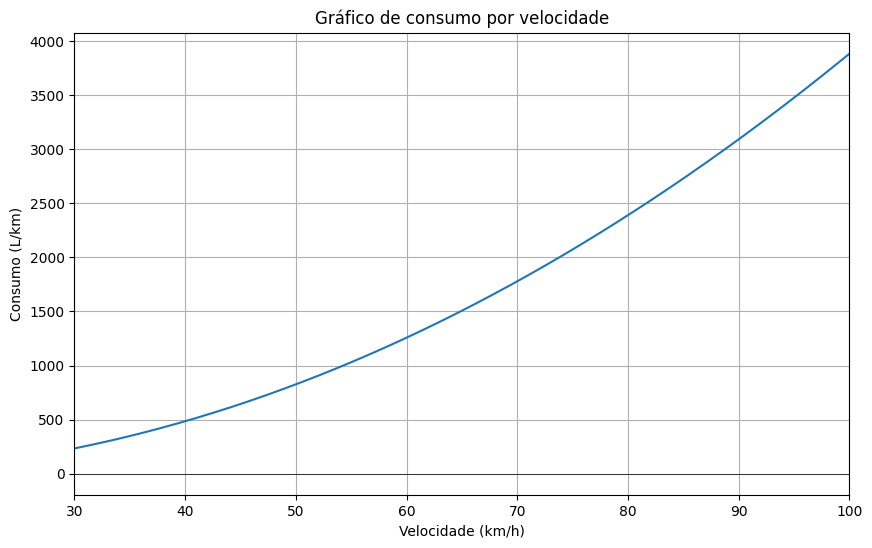

In [119]:
v_values = np.linspace(30, 100, 400) 

y_values = [funcao_quadratica(val, a, b, c) for val in v_values]

plt.figure(figsize=(10, 6))
plt.plot(v_values, y_values)
plt.title('Gráfico de consumo por velocidade')
plt.xlabel('Velocidade (km/h)')
plt.ylabel('Consumo (L/km)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(30, 100)
plt.show()

Ao observar o gráfico acima, nota-se que há um aumento considerável no consumo conforme o carro vai acelerando, ou seja, quanto maior a velocidade = maior o consumo

---

# ETAPA 6: COMPARAÇÃO CARRO MAIS ECONÔMICO VS MENOS ECONÔMICO

In [120]:
carro_mais_economico = df.loc[df['Consumo Gas. ou Di. - Cidade (km/l)'].idxmax()]
print(carro_mais_economico)

Categoria                                Extra Grande
Marca                                             BYD
Modelo                                      SONG PLUS
Versão                                          GS DM
Motor                                         1.5-16V
Propulsão                                     Plug-in
Transmissão e Velocidades                         A-1
Ar\nCondicionado                                    S
Direção\nAssistida                                  E
Combustível                                         G
NMOG+NOx\n(mg/km)                                   6
CO\n(mg/km)                                        21
CHO\n(mg/km)                                        0
Emissões Etanol (CO2 g/km)                          \
Emissões Gasolina/Diesel (CO2 g/km)              16.0
Emissões PHEV (CO2 g/km)                          0.0
Consumo Etanol - Cidade (km/l)                      \
Consumo Etanol - Estrada (km/l)                     \
Consumo Gas. ou Di. - Cidade

In [121]:
carro_mais_beberrao = df.loc[df['Consumo Gas. ou Di. - Cidade (km/l)'].idxmin()]
print(carro_mais_beberrao)

Categoria                                   Picape
Marca                                         FORD
Modelo                                   Nova F150
Versão                                      Tremor
Motor                                    5.0 - 32V
Propulsão                                Combustão
Transmissão e Velocidades                     A-10
Ar\nCondicionado                                 S
Direção\nAssistida                               E
Combustível                                      G
NMOG+NOx\n(mg/km)                               42
CO\n(mg/km)                                    274
CHO\n(mg/km)                                     1
Emissões Etanol (CO2 g/km)                       \
Emissões Gasolina/Diesel (CO2 g/km)          209.0
Emissões PHEV (CO2 g/km)                       NaN
Consumo Etanol - Cidade (km/l)                   \
Consumo Etanol - Estrada (km/l)                  \
Consumo Gas. ou Di. - Cidade (km/l)            6.0
Consumo Gas. ou Di. - Estrada (

---

Encontrados os parâmetros da função C(v) e os dados necessários, já podemos aplicar ao uso pelo sistema

# ETAPA 7: APLICAÇÃO DOS DADOS COLETADOS

---